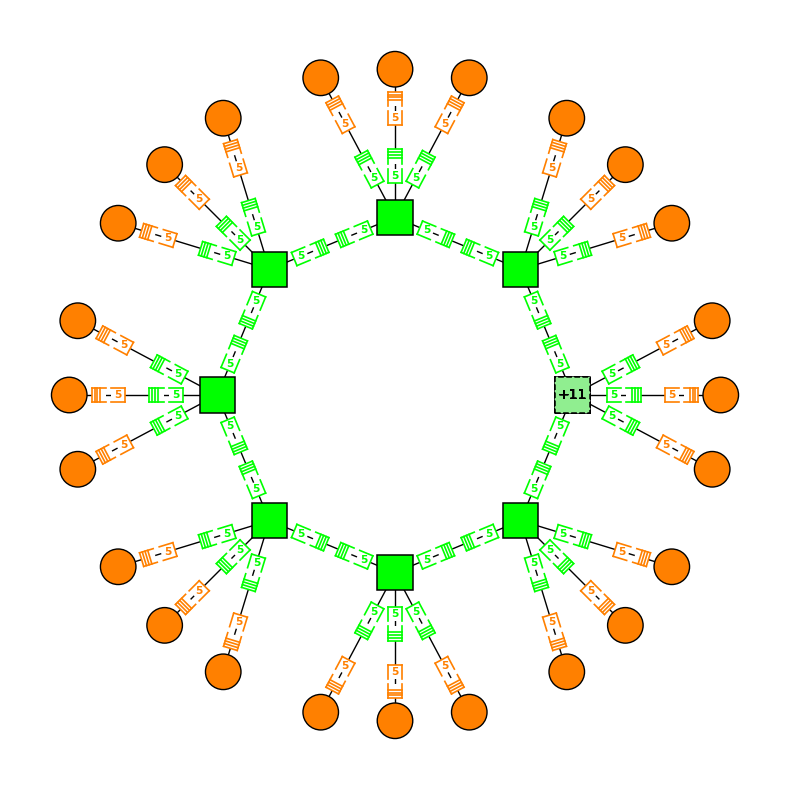

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

def draw_buffer(ax, center, size=1.0, color='#90ee90', linewidth=1, angle_deg=0, buf_number=0, hide_buffer=False):
    """Draws a square without the top edge, with rotation support, horizontal lines or a number inside, and a white background."""
    if not hide_buffer:
        half = size / 2
        # Draw white background (filled square)
        theta = np.deg2rad(angle_deg)
        rot = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
        points = np.array([
            [-half, -half],
            [ half, -half],
            [ half,  half],
            [-half,  half],
        ])
        points_rot = points @ rot.T + np.array(center)
        poly = patches.Polygon(points_rot, closed=True, facecolor='white', edgecolor='none', zorder=2)
        ax.add_patch(poly)

        # Draw 3 sides (without the top)
        ax.plot([points_rot[0,0], points_rot[1,0]], [points_rot[0,1], points_rot[1,1]], color=color, linewidth=linewidth, zorder=3)
        ax.plot([points_rot[1,0], points_rot[2,0]], [points_rot[1,1], points_rot[2,1]], color=color, linewidth=linewidth, zorder=3)
        ax.plot([points_rot[3,0], points_rot[0,0]], [points_rot[3,1], points_rot[0,1]], color=color, linewidth=linewidth, zorder=3)

        if buf_number <= 4:
            for i in range(buf_number-1):
                frac = (i + 1) / (buf_number + 1)
                y = -half + frac * size
                line = np.array([
                    [-half, y],
                    [ half, y]
                ])
                line_rot = line @ rot.T + np.array(center)
                ax.plot([line_rot[0,0], line_rot[1,0]], [line_rot[0,1], line_rot[1,1]], color=color, linewidth=linewidth, zorder=4)
        else:
            ax.text(center[0], center[1], str(buf_number), color=color, fontsize=size*16, ha="center", va="center", fontweight="bold", zorder=5)
    
def draw_graph_grouped(num_green, num_orange_per_green, 
                            hide_buffer,
                            buf_out_red, buf_in_red, 
                            buf_out_green, buf_in_green,
                            buf_out_orage, buf_in_orage,
                            ring_instead_of_star=True, n_instead_of_number=False,
                            circle_instead_of_square=False):
    
    # Sizes of elements and radii
    outer_radius=11
    inner_radius=6 
    group_spread=0.23 
    square_size_grean=1.2
    square_size=0.48
    circle_size=0.6
    center_size=1.2

    # Fixed image size 2000x2000 pixels for JPG (figsize=10, dpi=200)
    fig, ax = plt.subplots(figsize=(10, 10))

    max_display_green_nodes = 8
    num_green2 = min(num_green, max_display_green_nodes)
    angles = np.linspace(np.pi / 2, 2.5 * np.pi, num_green2, endpoint=False)
    green_positions = []

    for angle in angles:
        x = inner_radius * np.cos(angle)
        y = inner_radius * np.sin(angle)
        green_positions.append((x, y))

    # Central red square
    if not ring_instead_of_star:
        ax.add_patch(
            patches.Rectangle(
                (-center_size/2, -center_size/2), center_size, center_size, 
                facecolor="red", edgecolor="black", linewidth=1, zorder=3
            )
        )

        # Draw buffers between red center and each green square
        if circle_instead_of_square and num_orange_per_green == 0:
            object_color=(1, 0.5, 0)
        else:
            object_color='#00ff00'

        for x, y in green_positions:
            sqx = x * 0.2  
            sqy = y * 0.2
            angle_deg = np.rad2deg(np.arctan2(sqy, sqx))
            draw_buffer(ax, (sqx, sqy), square_size, color='red', linewidth=1.2, angle_deg=angle_deg-90, buf_number=buf_in_red)

            sqx = x * 0.31  
            sqy = y * 0.31
            angle_deg = np.rad2deg(np.arctan2(sqy, sqx))
            draw_buffer(ax, (sqx, sqy), square_size, color='red', linewidth=1.2, angle_deg=angle_deg+90, buf_number=buf_out_red)

            sqx = x * 0.69 
            sqy = y * 0.69
            angle_deg = np.rad2deg(np.arctan2(sqy, sqx))
            draw_buffer(ax, (sqx, sqy), square_size, color=object_color, linewidth=1.2, angle_deg=angle_deg-90, buf_number=buf_out_green)

            sqx = x * 0.8  
            sqy = y * 0.8
            angle_deg = np.rad2deg(np.arctan2(sqy, sqx))
            draw_buffer(ax, (sqx, sqy), square_size, color=object_color, linewidth=1.2, angle_deg=angle_deg+90, buf_number=buf_in_green)

        # Lines from the center to the green squares
        for x, y in green_positions:
            ax.plot([0, x], [0, y], color="black", linewidth=1, zorder=1)

    extra_count = 0
    if num_green > max_display_green_nodes:
        extra_count = num_green - max_display_green_nodes
        right_angle = 0
        extra_pos = (inner_radius * np.cos(right_angle), inner_radius * np.sin(right_angle))

    if circle_instead_of_square and num_orange_per_green == 0:
        object_color=(1, 0.5, 0)
    else:
        object_color='#00ff00'

    # Lines between green squares in a circle
    if ring_instead_of_star:   
        for i in range(len(green_positions)):
            x1, y1 = green_positions[i]
            x2, y2 = green_positions[(i + 1) % len(green_positions)]
            ax.plot([x1, x2], [y1, y2], color="black", linewidth=1, zorder=1)
        
        # Draw buffers for green squares in circle 
        for i in range(len(green_positions)):
            x1, y1 = green_positions[i]
            x2, y2 = green_positions[(i + 1) % len(green_positions)]
            mx = x1 + 0.75 * (x2 - x1)
            my = y1 + 0.75 * (y2 - y1)
            angle_deg = np.rad2deg(np.arctan2(y2 - y1, x2 - x1))
            draw_buffer(ax, (mx, my), square_size, color=object_color, linewidth=1.2, angle_deg=angle_deg+90, buf_number=buf_in_green, hide_buffer=hide_buffer)

            mx1 = x1 + 0.6 * (x2 - x1)
            my1 = y1 + 0.6 * (y2 - y1)
            draw_buffer(ax, (mx1, my1), square_size, color=object_color, linewidth=1.2, angle_deg=angle_deg-90, buf_number=buf_out_green, hide_buffer=hide_buffer)


            mx2 = x1 + 0.4 * (x2 - x1)
            my2 = y1 + 0.4 * (y2 - y1)
            draw_buffer(ax, (mx2, my2), square_size, color=object_color, linewidth=1.2, angle_deg=angle_deg+90, buf_number=buf_out_green, hide_buffer=hide_buffer)

            mx3 = x1 + 0.25 * (x2 - x1)
            my3 = y1 + 0.25 * (y2 - y1)
            draw_buffer(ax, (mx3, my3), square_size, color=object_color, linewidth=1.2, angle_deg=angle_deg-90, buf_number=buf_in_green, hide_buffer=hide_buffer)
    
    for x, y in green_positions:
        
        if circle_instead_of_square and num_orange_per_green == 0:  # Draw orange circle instead of green square if there are no m elements
            
            circle = patches.Circle((x, y), circle_size, 
                facecolor=(1, 0.5, 0), edgecolor="black", linewidth=1.1, zorder=3)
            
            ax.add_patch(circle)
            # If there is an extra circle, draw it (when, the number of elements is greater than the maximum 8)
            if extra_count > 0:
                circle1 = patches.Circle((extra_pos[0], extra_pos[1]), circle_size, facecolor="#e0ee90", edgecolor="black", linewidth=1.1, zorder=3, linestyle='--')
                
                ax.add_patch(circle1)
                if n_instead_of_number:
                    ax.text(extra_pos[0], extra_pos[1], r"$n$", color="black", fontsize=15, ha="center", va="center", fontweight="bold", zorder=5)
                else:
                    ax.text(extra_pos[0], extra_pos[1], f"+{extra_count+1}", color="black", fontsize=10, ha="center", va="center", zorder=5)

        else:
            square = patches.Rectangle((x - square_size_grean / 2, y - square_size_grean / 2), square_size_grean, square_size_grean,
                facecolor='#00ff00', edgecolor="black", linewidth=1.1, zorder=3
            )
            ax.add_patch(square)

            # If there is an extra square, draw it  (when, the number of elements is greater than the maximum 8)
            if extra_count > 0:
                square = patches.Rectangle((extra_pos[0] - square_size_grean / 2, extra_pos[1] - square_size_grean / 2), square_size_grean, square_size_grean,
                                        facecolor='#90ee90', linestyle='--',edgecolor="black", linewidth=1.1, zorder=3)
                ax.add_patch(square)
                if n_instead_of_number:
                    ax.text(extra_pos[0], extra_pos[1], r"$n$", color="black", fontsize=15, ha="center", va="center", fontweight="bold", zorder=5)
                else:
                    ax.text(extra_pos[0], extra_pos[1], f"+{extra_count+1}", color="black", fontsize=10, ha="center", va="center", zorder=5)
            
    # Draw orange circles and buffers near them
    for i, (x, y) in enumerate(green_positions):
        angle = angles[i]
        
        if num_orange_per_green > 3: # Draw up to 3 circle 
            gx = outer_radius * np.cos(angle)
            gy = outer_radius * np.sin(angle)
            circle = patches.Circle((gx, gy), circle_size, facecolor=(1, 0.5, 0), edgecolor="black", linewidth=1, zorder=4)
            ax.add_patch(circle)
            ax.text(gx, gy, str(num_orange_per_green), color="black", fontsize=10, ha="center", va="center", fontweight="bold", zorder=5)
            ax.plot([x, gx], [y, gy], color="black", linewidth=1, zorder=1)

            # Draw buffers between green squares and orange circle
            sqx = x + (gx - x) * 0.67
            sqy = y + (gy - y) * 0.67
            angle_deg = np.rad2deg(np.arctan2(gy - sqy, gx - sqx)) - 90
            draw_buffer(ax, (sqx, sqy), square_size, color=(1, 0.5, 0), linewidth=1.2, angle_deg=angle_deg, buf_number=buf_out_orage, hide_buffer=hide_buffer)

            sqx1 = x + (gx - x) * 0.80
            sqy1 = y + (gy - y) * 0.80
            draw_buffer(ax, (sqx1, sqy1), square_size, color=(1, 0.5, 0), linewidth=1.2, angle_deg=angle_deg + 180, buf_number=buf_in_orage, hide_buffer=hide_buffer)

            sqx2 = x + (gx - x) * 0.28
            sqy2 = y + (gy - y) * 0.28
            draw_buffer(ax, (sqx2, sqy2), square_size, color='#00ff00', linewidth=1.2, angle_deg=angle_deg, buf_number=buf_in_green, hide_buffer=hide_buffer)
                
            sqx3 = x + (gx - x) * 0.41
            sqy3 = y + (gy - y) * 0.41
            draw_buffer(ax, (sqx3, sqy3), square_size, color='#00ff00', linewidth=1.2, angle_deg=angle_deg + 180, buf_number=buf_out_green, hide_buffer=hide_buffer)

        else: # One circle with a number inside
            if num_orange_per_green == 1:
                offsets = [0]
            else:
                offsets = np.linspace(-group_spread, group_spread, num_orange_per_green)
 
            for offset in offsets:
                gx = outer_radius * np.cos(angle + offset)
                gy = outer_radius * np.sin(angle + offset)
                circle = patches.Circle((gx, gy), circle_size, facecolor=(1, 0.5, 0), edgecolor="black", linewidth=1, zorder=4)
                ax.add_patch(circle)
                ax.plot([x, gx], [y, gy], color="black", linewidth=1, zorder=1)

                # Draw buffers between green squares and orange circle
                sqx = x + (gx - x) * 0.67
                sqy = y + (gy - y) * 0.67
                angle_deg = np.rad2deg(np.arctan2(gy - sqy, gx - sqx)) - 90
                draw_buffer(ax, (sqx, sqy), square_size, color=(1, 0.5, 0), linewidth=1.2, angle_deg=angle_deg, buf_number=buf_out_orage, hide_buffer=hide_buffer)
                
                sqx1 = x + (gx - x) * 0.80
                sqy1 = y + (gy - y) * 0.80
                draw_buffer(ax, (sqx1, sqy1), square_size, color=(1, 0.5, 0), linewidth=1.2, angle_deg=angle_deg + 180, buf_number=buf_in_orage, hide_buffer=hide_buffer)

                sqx2 = x + (gx - x) * 0.28
                sqy2 = y + (gy - y) * 0.28
                draw_buffer(ax, (sqx2, sqy2), square_size, color='#00ff00', linewidth=1.2, angle_deg=angle_deg, buf_number=buf_in_green, hide_buffer=hide_buffer)
                
                sqx3 = x + (gx - x) * 0.41
                sqy3 = y + (gy - y) * 0.41
                draw_buffer(ax, (sqx3, sqy3), square_size, color='#00ff00', linewidth=1.2, angle_deg=angle_deg + 180, buf_number=buf_out_green, hide_buffer=hide_buffer)
    
    ax.set_aspect('equal')
    ax.set_xlim(-outer_radius - 2, outer_radius + 2)
    ax.set_ylim(-outer_radius - 2, outer_radius + 2)
    ax.axis('off')

    # Save image in pdf, svg, jpg, png formats
    plt.savefig("graph_output.pdf", bbox_inches='tight')
    plt.savefig("graph_output.svg", bbox_inches='tight')
    plt.savefig("graph_output.jpg", bbox_inches=None, dpi=200)  # 2000x2000 px
    plt.savefig("graph_output.png", bbox_inches=None, dpi=200)  # 2000x2000 px

    plt.show()

# Example usage:
draw_graph_grouped(num_green=18, num_orange_per_green=3, # numbers of each elements
                    hide_buffer=False, # whether or not buffers should be drawn
                    
                    buf_out_red=6,buf_in_red=5,     #wich number should be inside the buffers of each element
                    buf_out_green=4, buf_in_green=5,
                    buf_out_orage=5, buf_in_orage=4,

                    ring_instead_of_star=True,  # Indicates the type of topology: ring or star

                    n_instead_of_number=False, #if the element is more than 8, the missing squares are shown in the rightmost square either by number or by the designation n
                    
                    circle_instead_of_square=True) 